In [1]:
!pip3 install numpy pandas scikit-learn matplotlib seaborn xgboost lightgbm tensorflow optuna scipy statsmodels openpyxl pandas-profiling imbalanced-learn plotly yellowbrick jupyter tqdm category_encoders

In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer

In [4]:
# Feature selection and engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from scipy import stats

In [5]:
# Models
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import optuna

In [7]:
# Visualization settings
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style using seaborn
sns.set_style("whitegrid")  # or "darkgrid", "white", "dark", "ticks"
sns.set_context("notebook")  # or "paper", "talk", "poster"
sns.set_palette("husl")

# Additional matplotlib settings for better visualizations
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# If you want to use a specific color palette, you can choose from:
# "deep", "muted", "pastel", "bright", "dark", "colorblind"
# Example:
# sns.set_palette("deep")

# To see available matplotlib styles:
print("Available matplotlib styles:", plt.style.available)

# To see available seaborn palettes:
print("\nAvailable seaborn color palettes:")
print([p for p in dir(sns.color_palette()) if not p.startswith('_')])

Available matplotlib styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

Available seaborn color palettes:
['append', 'as_hex', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


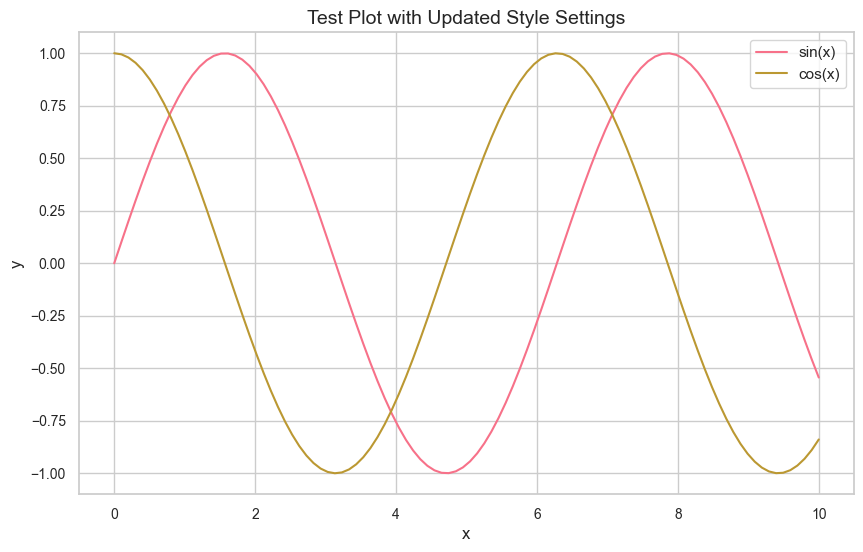

In [8]:
# Test plot to verify visualization settings
import numpy as np

# Generate sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create test plot
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.title('Test Plot with Updated Style Settings')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 2. Data Loading and Initial Exploration
def load_data(file_path_2009, file_path_2010):
    """
    Load and combine data from both Excel files
    """
    print("Loading datasets...")
    df_2009 = pd.read_excel(file_path_2009)
    df_2010 = pd.read_excel(file_path_2010)
    
    # Combine datasets
    df = pd.concat([df_2009, df_2010], axis=0, ignore_index=True)
    print(f"Total records loaded: {len(df)}")
    
    return df

def initial_exploration(df):
    """
    Perform initial data exploration
    """
    print("\n=== Dataset Overview ===")
    print("\nFirst few rows:")
    display(df.head())
    
    print("\nDataset Info:")
    display(df.info())
    
    print("\nBasic Statistics:")
    display(df.describe())
    
    print("\nMissing Values:")
    display(df.isnull().sum())
    
    return df

In [10]:
# 3. Data Preprocessing and Feature Engineering
# Set random seed for reproducibility
np.random.seed(42)

def load_data(file_path, sheet_names):
    """
    Load and combine data from Excel sheets
    """
    print("Loading datasets...")
    
    # Initialize empty list to store dataframes
    dfs = []
    
    # Read each sheet and append to list
    for sheet in sheet_names:
        try:
            df = pd.read_excel(file_path, sheet_name=sheet)
            dfs.append(df)
            print(f"Successfully loaded sheet: {sheet}")
        except Exception as e:
            print(f"Error loading sheet {sheet}: {str(e)}")
    
    # Combine all dataframes
    if dfs:
        df = pd.concat(dfs, axis=0, ignore_index=True)
        print(f"Total records loaded: {len(df)}")
        return df
    else:
        raise ValueError("No data was loaded from the Excel file")

def initial_exploration(df):
    """
    Perform initial data exploration
    """
    print("\n=== Dataset Overview ===")
    print("\nFirst few rows:")
    print(df.head())
    
    print("\nDataset Info:")
    print(df.info())
    
    print("\nBasic Statistics:")
    print(df.describe())
    
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    return df

def preprocess_data(df):
    """
    Comprehensive data preprocessing and feature engineering
    """
    print("Starting data preprocessing...")
    
    # Create a copy of the dataframe
    df = df.copy()
    
    # Rename the Customer ID column if it has a space
    if 'Customer ID' in df.columns:
        df = df.rename(columns={'Customer ID': 'CustomerID'})
    
    # 3.1 Basic Cleaning
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Handle missing values
    df = df.dropna(subset=['CustomerID'])  # Remove rows without CustomerID
    
    # Remove invalid entries
    df = df[df['Quantity'] > 0]
    df = df[df['Price'] > 0]
    
    # 3.2 Date Processing
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    
    # 3.3 Feature Engineering
    # Basic features
    df['Total_Amount'] = df['Quantity'] * df['Price']
    df['Hour'] = df['InvoiceDate'].dt.hour
    df['Day_of_Week'] = df['InvoiceDate'].dt.dayofweek
    df['Month'] = df['InvoiceDate'].dt.month
    df['Year'] = df['InvoiceDate'].dt.year
    df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)
    
    # 3.4 RFM Analysis
    current_date = df['InvoiceDate'].max()
    
    # Print debug information
    print("\nDebug Info:")
    print(f"Number of unique customers: {df['CustomerID'].nunique()}")
    print(f"Date range: from {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
    
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
        'Invoice': 'count',  # Frequency
        'Total_Amount': 'sum'  # Monetary
    })
    
    rfm.columns = ['Recency', 'Frequency', 'Monetary']
    
    # 3.5 Advanced Customer Metrics
    customer_metrics = df.groupby('CustomerID').agg({
        'Quantity': ['count', 'mean', 'std', 'min', 'max'],
        'Price': ['mean', 'std', 'min', 'max'],
        'Total_Amount': ['mean', 'std', 'min', 'max'],
        'Hour': ['mean', 'std'],
        'Is_Weekend': 'mean'
    }).fillna(0)
    
    # Flatten column names
    customer_metrics.columns = [f'{x[0]}_{x[1]}' for x in customer_metrics.columns]
    
    # 3.6 Time-based Features
    def calculate_purchase_intervals(customer_id):
        # Get all purchase dates for this customer
        dates = sorted(df[df['CustomerID'] == customer_id]['InvoiceDate'])
        if len(dates) < 2:
            return 0, 0
        # Calculate intervals in days
        intervals = [(dates[i+1] - dates[i]).days for i in range(len(dates)-1)]
        return np.mean(intervals), np.std(intervals) if len(intervals) > 1 else 0
    
    # Calculate purchase intervals for each customer
    purchase_intervals = []
    unique_customers = df['CustomerID'].unique()
    
    for customer in unique_customers:
        mean_interval, std_interval = calculate_purchase_intervals(customer)
        purchase_intervals.append([mean_interval, std_interval])
    
    purchase_intervals_df = pd.DataFrame(
        purchase_intervals, 
        index=unique_customers,
        columns=['Avg_Purchase_Interval', 'Std_Purchase_Interval']
    )
    
    # 3.7 Combine Features
    final_features = pd.merge(rfm, customer_metrics, 
                            left_index=True, right_index=True, 
                            how='left')
    final_features = pd.merge(final_features, purchase_intervals_df,
                            left_index=True, right_index=True,
                            how='left')
    
    # 3.8 Handle Outliers
    def handle_outliers(df, columns, n_std=3):
        for column in columns:
            mean = df[column].mean()
            std = df[column].std()
            df[column] = df[column].clip(lower=mean - n_std * std, 
                                       upper=mean + n_std * std)
        return df
    
    numerical_columns = final_features.select_dtypes(include=['float64', 'int64']).columns
    final_features = handle_outliers(final_features, numerical_columns)
    
    print("Preprocessing completed. Final feature shape:", final_features.shape)
    
    # Print summary of final features
    print("\nSummary of final features:")
    print(final_features.describe())
    
    return final_features

In [21]:
# 4. Data Splitting and Feature Scaling
def split_and_scale_data(X, y, test_size=0.2, valid_size=0.1, random_state=42):
    """
    Split data into train, validation, test sets and scale features
    """
    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Second split: create validation set
    valid_ratio = valid_size / (1 - test_size)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_temp, y_temp, test_size=valid_ratio, random_state=random_state
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    print("Data split and scaling complete:")
    print(f"Training set: {X_train_scaled.shape}")
    print(f"Validation set: {X_valid_scaled.shape}")
    print(f"Test set: {X_test_scaled.shape}")
    
    return (X_train_scaled, X_valid_scaled, X_test_scaled, 
            y_train, y_valid, y_test, scaler)


In [22]:
# 5. Model Development
class CustomerValuePredictor:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.xgb_model = None
        self.nn_model = None
        self.scaler = None
        self.feature_names = None
    
    def _optimize_xgboost(self, trial, X_train, X_valid, y_train, y_valid):
        """
        Optimize XGBoost hyperparameters using Optuna
        """
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 12),
            'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
            'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True)
        }
        
        model = XGBRegressor(**param, random_state=self.random_state)
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            verbose=False
        )
        
        preds = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(y_valid, preds))
        return -rmse
    
    def _create_neural_network(self, input_dim):
        """
        Create neural network architecture
        """
        model = Sequential([
            Dense(128, activation='relu', input_dim=input_dim),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.1),
            
            Dense(1)
        ])
        
        model.compile(
            optimizer='adam',
            loss='mse',
            metrics=['mae']
        )
        
        return model
    
    def train(self, X_train, X_valid, y_train, y_valid, n_trials=100):
        """
        Train both XGBoost and Neural Network models
        """
        # Train XGBoost
        print("\nTraining XGBoost model...")
        study = optuna.create_study(direction='maximize')
        study.optimize(
            lambda trial: self._optimize_xgboost(
                trial, X_train, X_valid, y_train, y_valid
            ),
            n_trials=n_trials
        )
        
        best_params = study.best_params
        self.xgb_model = XGBRegressor(**best_params, random_state=self.random_state)
        self.xgb_model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            verbose=False
        )
        
        # Train Neural Network
        print("\nTraining Neural Network...")
        self.nn_model = self._create_neural_network(X_train.shape[1])
        
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        )
        
        self.nn_history = self.nn_model.fit(
            X_train, y_train,
            validation_data=(X_valid, y_valid),
            epochs=100,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=1
        )
    
    def evaluate(self, X_test, y_test):
        """
        Evaluate both models
        """
        results = {}
        
        # XGBoost evaluation
        xgb_preds = self.xgb_model.predict(X_test)
        results['XGBoost'] = {
            'mse': mean_squared_error(y_test, xgb_preds),
            'rmse': np.sqrt(mean_squared_error(y_test, xgb_preds)),
            'mae': mean_absolute_error(y_test, xgb_preds),
            'r2': r2_score(y_test, xgb_preds)
        }
        
        # Neural Network evaluation
        nn_preds = self.nn_model.predict(X_test)
        results['Neural Network'] = {
            'mse': mean_squared_error(y_test, nn_preds),
            'rmse': np.sqrt(mean_squared_error(y_test, nn_preds)),
            'mae': mean_absolute_error(y_test, nn_preds),
            'r2': r2_score(y_test, nn_preds)
        }
        
        return results
    
    def plot_results(self, X_test, y_test):
        """
        Create visualizations of model performance
        """
        # Feature importance for XGBoost
        if hasattr(self.xgb_model, 'feature_importances_'):
            plt.figure(figsize=(12, 6))
            plt.title('XGBoost Feature Importance')
            plt.bar(range(len(self.xgb_model.feature_importances_)), 
                   self.xgb_model.feature_importances_)
            plt.xticks(range(len(self.feature_names)), 
                      self.feature_names, rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        
        # Learning curves for Neural Network
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.nn_history.history['loss'], label='Training Loss')
        plt.plot(self.nn_history.history['val_loss'], label='Validation Loss')
        plt.title('Neural Network Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(self.nn_history.history['mae'], label='Training MAE')
        plt.plot(self.nn_history.history['val_mae'], label='Validation MAE')
        plt.title('Neural Network MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        plt.tight_layout()
        plt.show()

Starting model training and evaluation...
Loading datasets...
Successfully loaded sheet: Year 2009-2010
Successfully loaded sheet: Year 2010-2011
Total records loaded: 1067371

=== Dataset Overview ===

First few rows:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


[I 2024-11-14 11:38:08,402] A new study created in memory with name: no-name-9ba92f08-9a64-47c3-aac6-6b1dfbed93cd


Preprocessing completed. Final feature shape: (5878, 21)

Summary of final features:
           Recency    Frequency      Monetary  Quantity_count  Quantity_mean  \
count  5878.000000  5878.000000   5878.000000     5878.000000    5878.000000   
mean    200.331916   121.400791   2434.174701      121.400791      19.506979   
std     209.338707   186.727219   5206.255404      186.727219      68.112291   
min       0.000000     1.000000      2.950000        1.000000       1.000000   
25%      25.000000    20.000000    342.280000       20.000000       5.649639   
50%      95.000000    52.000000    867.740000       52.000000       9.603727   
75%     379.000000   138.000000   2248.305000      138.000000      14.178030   
max     738.000000  1159.170651  46278.462159     1159.170651    1120.514659   

       Quantity_std  Quantity_min  Quantity_max   Price_mean    Price_std  \
count   5878.000000   5878.000000   5878.000000  5878.000000  5878.000000   
mean      17.393278      4.035536     92

[I 2024-11-14 11:38:08,923] Trial 0 finished with value: -1255.4886972279905 and parameters: {'n_estimators': 268, 'max_depth': 4, 'learning_rate': 0.013388517177980598, 'subsample': 0.7598400892339691, 'colsample_bytree': 0.8276250308213916, 'min_child_weight': 5, 'gamma': 0.00011193205326184869, 'reg_alpha': 0.0015924386544521989, 'reg_lambda': 8.168341480240232e-08}. Best is trial 0 with value: -1255.4886972279905.
[I 2024-11-14 11:38:10,218] Trial 1 finished with value: -1073.6707501824446 and parameters: {'n_estimators': 974, 'max_depth': 6, 'learning_rate': 0.023841649089851723, 'subsample': 0.9572915753654013, 'colsample_bytree': 0.7921064081082825, 'min_child_weight': 3, 'gamma': 1.4227478956129663e-08, 'reg_alpha': 7.562306643960612e-06, 'reg_lambda': 1.4576061688430049e-08}. Best is trial 1 with value: -1073.6707501824446.
[I 2024-11-14 11:38:11,746] Trial 2 finished with value: -1063.7832298611065 and parameters: {'n_estimators': 396, 'max_depth': 11, 'learning_rate': 0.0122


Training Neural Network...
Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 37890188.0000 - mae: 2616.9189 - val_loss: 24390124.0000 - val_mae: 2276.6052
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 35583752.0000 - mae: 2595.3032 - val_loss: 24342444.0000 - val_mae: 2281.3674
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 31552020.0000 - mae: 2327.1733 - val_loss: 24308892.0000 - val_mae: 2285.4836
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 35449580.0000 - mae: 2448.1030 - val_loss: 24200916.0000 - val_mae: 2279.7188
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 41004296.0000 - mae: 2646.6885 - val_loss: 24139818.0000 - val_mae: 2273.7812
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 34912816.0000 - mae: 2461.2368 - val_loss: 24063184.0000 - val_mae: 2265.4490
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 29426294.0000 - mae: 2420.4602 - val_loss: 23899900.0000 - val_ma

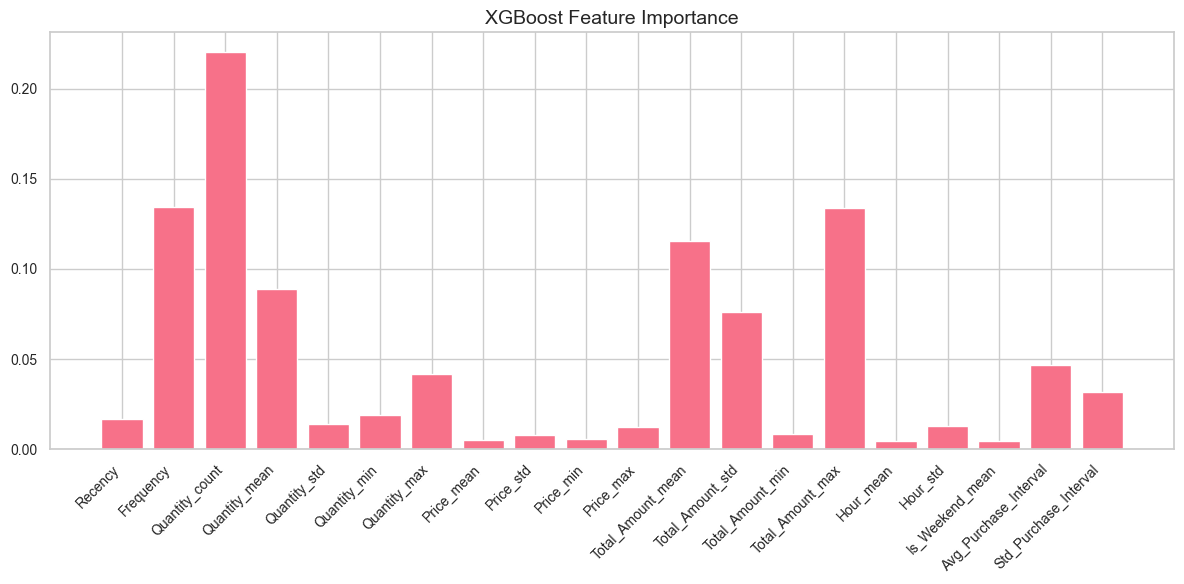

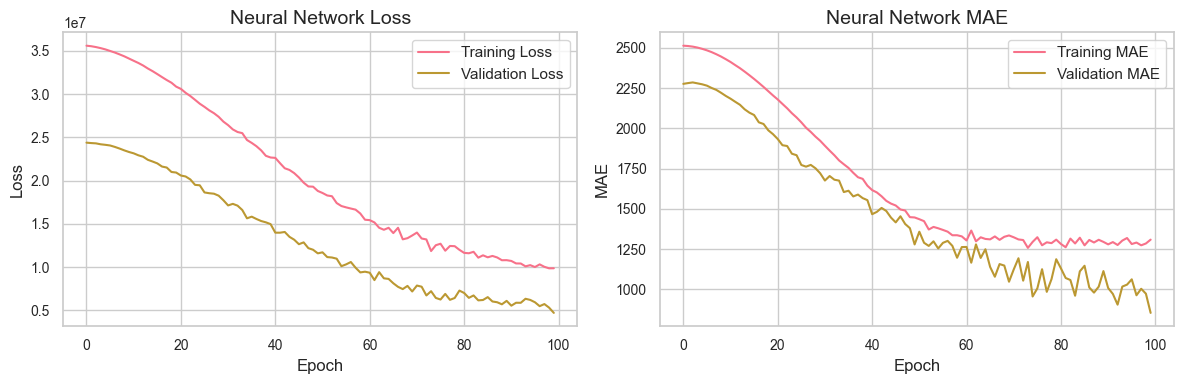

In [27]:
if __name__ == "__main__":
    try:
        print("Starting model training and evaluation...")

        # 1. Load and preprocess data
        file_path = "online_retail_II.xlsx"
        sheet_names = ["Year 2009-2010", "Year 2010-2011"]
        
        df = load_data(file_path, sheet_names)
        df = initial_exploration(df)
        final_features = preprocess_data(df)
        
        # 2. Define features (X) and target (y)
        # Replace 'Monetary' with your actual target column name if different
        X = final_features.drop(columns=['Monetary'])
        y = final_features['Monetary']
        
        # 3. Split and scale data
        X_train, X_valid, X_test, y_train, y_valid, y_test, scaler = split_and_scale_data(X, y)

        # 4. Initialize and train models
        predictor = CustomerValuePredictor()
        predictor.feature_names = X.columns
        predictor.train(X_train, X_valid, y_train, y_valid)
        
        # 5. Evaluate models
        results = predictor.evaluate(X_test, y_test)
        
        # 6. Print results
        print("\nModel Evaluation Results:")
        for model_name, metrics in results.items():
            print(f"\n{model_name}:")
            for metric_name, value in metrics.items():
                print(f"{metric_name}: {value:.4f}")
        
        # 7. Plot results
        predictor.plot_results(X_test, y_test)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise


# 6. Model Development and Training

In [28]:
# Set random seed for reproducibility
np.random.seed(42)

# 6.1 XGBoost Model with Optuna Optimization
def optimize_xgboost(trial, X_train, X_valid, y_train, y_valid):
    """
    Optimize XGBoost hyperparameters using Optuna
    """
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True)
    }
    
    model = XGBRegressor(**param, random_state=42)
    
    # Fit model with eval_set
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=False
    )
    
    # Evaluate on validation set
    preds = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    return -rmse  # Negative because Optuna minimizes

def train_xgboost_model(X_train, X_valid, y_train, y_valid, n_trials=100):
    """
    Train XGBoost model with optimized hyperparameters
    """
    print("Starting XGBoost hyperparameter optimization...")
    study = optuna.create_study(direction='maximize')
    study.optimize(
        lambda trial: optimize_xgboost(trial, X_train, X_valid, y_train, y_valid),
        n_trials=n_trials
    )
    
    # Train final model with best parameters
    best_params = study.best_params
    print("\nBest XGBoost Parameters:", best_params)
    
    final_model = XGBRegressor(**best_params, random_state=42)
    
    # Fit the final model
    final_model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=False
    )
    
    return final_model, study

# 6.2 Neural Network Model
def create_neural_network(input_dim):
    """
    Create a deep neural network model
    """
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        
        Dense(1)
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

def train_neural_network(X_train, X_valid, y_train, y_valid, epochs=500):
    """
    Train neural network model with early stopping
    """
    print("Creating and training Neural Network...")
    model = create_neural_network(X_train.shape[1])
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    )
    
    checkpoint = ModelCheckpoint(
        'best_nn_model.h5',
        monitor='val_loss',
        save_best_only=True
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping, checkpoint],
        verbose=1
    )
    
    return model, history

In [29]:
# 7. Model Evaluation and Metrics
def evaluate_models(models, X_test, y_test, X_valid=None, y_valid=None):
    """
    Evaluate multiple models and compare their performance
    """
    results = {}
    
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        
        # Make predictions
        if X_valid is not None:
            valid_preds = model.predict(X_valid)
            test_preds = model.predict(X_test)
            
            # Calculate metrics for validation set
            valid_metrics = {
                'valid_mse': mean_squared_error(y_valid, valid_preds),
                'valid_rmse': np.sqrt(mean_squared_error(y_valid, valid_preds)),
                'valid_mae': mean_absolute_error(y_valid, valid_preds),
                'valid_r2': r2_score(y_valid, valid_preds)
            }
            
            # Calculate metrics for test set
            test_metrics = {
                'test_mse': mean_squared_error(y_test, test_preds),
                'test_rmse': np.sqrt(mean_squared_error(y_test, test_preds)),
                'test_mae': mean_absolute_error(y_test, test_preds),
                'test_r2': r2_score(y_test, test_preds)
            }
            
            results[name] = {**valid_metrics, **test_metrics}
        else:
            test_preds = model.predict(X_test)
            results[name] = {
                'test_mse': mean_squared_error(y_test, test_preds),
                'test_rmse': np.sqrt(mean_squared_error(y_test, test_preds)),
                'test_mae': mean_absolute_error(y_test, test_preds),
                'test_r2': r2_score(y_test, test_preds)
            }
    
    return results

In [30]:
# 8. Visualization Functions
def plot_feature_importance(model, feature_names, title="Feature Importance"):
    """
    Plot feature importance for tree-based models
    """
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]
        
        plt.figure(figsize=(12, 6))
        plt.title(title)
        plt.bar(range(len(indices)), importance[indices])
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

def plot_learning_curves(history):
    """
    Plot learning curves for neural network training
    """
    plt.figure(figsize=(12, 4))
    
    # Loss curves
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # MAE curves
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_predictions_scatter(y_true, y_pred, title="Predicted vs Actual Values"):
    """
    Create scatter plot of predicted vs actual values
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [34]:
#9. Neural Network Training Functions
def create_neural_network(input_dim):
    """
    Create a deep neural network model
    """
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        
        Dense(1)
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

def train_neural_network(X_train, X_valid, y_train, y_valid, epochs=1000):
    """
    Train neural network model with early stopping
    """
    print("Creating and training Neural Network...")
    try:
        # Create model
        model = create_neural_network(X_train.shape[1])
        
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=20,
                restore_best_weights=True,
                mode='min'
            )
        ]
        
        # Optional checkpoint callback
        try:
            checkpoint = ModelCheckpoint(
                'best_nn_model.keras',  # Changed from .h5 to .keras
                monitor='val_loss',
                save_best_only=True,
                mode='min'
            )
            callbacks.append(checkpoint)
        except Exception as e:
            print(f"Warning: Could not create checkpoint callback: {str(e)}")
        
        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_valid, y_valid),
            epochs=epochs,
            batch_size=32,
            callbacks=callbacks,
            verbose=1
        )
        
        print("Neural Network training completed successfully!")
        return model, history
    
    except Exception as e:
        print(f"Error in Neural Network training: {str(e)}")
        raise

# Let's test the training function
if __name__ == "__main__":
    try:
        print("Starting model training and evaluation...")
        
        # Load and preprocess data
        file_path = "online_retail_II.xlsx"
        sheet_names = ["Year 2009-2010", "Year 2010-2011"]
        
        df = load_data(file_path, sheet_names)
        df = initial_exploration(df)
        final_features = preprocess_data(df)
        
        # Define features (X) and target (y)
        # Replace 'Monetary' with your actual target column if it is different
        X = final_features.drop(columns=['Monetary'])
        y = final_features['Monetary']
        
        # Split and scale data
        X_train_scaled, X_valid_scaled, X_test_scaled, y_train, y_valid, y_test, scaler = split_and_scale_data(X, y)
        
        # Train Neural Network model
        print("\nTraining Neural Network model...")
        nn_model, nn_history = train_neural_network(
            X_train_scaled, X_valid_scaled,
            y_train, y_valid
        )
        
        print("Training completed successfully!")
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")


Starting model training and evaluation...
Loading datasets...
Successfully loaded sheet: Year 2009-2010
Successfully loaded sheet: Year 2010-2011
Total records loaded: 1067371

=== Dataset Overview ===

First few rows:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [35]:
import joblib
warnings.filterwarnings('ignore')

Starting model training and evaluation...
Loading datasets...
Successfully loaded sheet: Year 2009-2010
Successfully loaded sheet: Year 2010-2011
Total records loaded: 1067371

=== Dataset Overview ===

First few rows:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


[I 2024-11-14 11:45:57,038] A new study created in memory with name: no-name-838bb2b5-7546-4b17-ac4b-bff0af94cefb


Preprocessing completed. Final feature shape: (5878, 21)

Summary of final features:
           Recency    Frequency      Monetary  Quantity_count  Quantity_mean  \
count  5878.000000  5878.000000   5878.000000     5878.000000    5878.000000   
mean    200.331916   121.400791   2434.174701      121.400791      19.506979   
std     209.338707   186.727219   5206.255404      186.727219      68.112291   
min       0.000000     1.000000      2.950000        1.000000       1.000000   
25%      25.000000    20.000000    342.280000       20.000000       5.649639   
50%      95.000000    52.000000    867.740000       52.000000       9.603727   
75%     379.000000   138.000000   2248.305000      138.000000      14.178030   
max     738.000000  1159.170651  46278.462159     1159.170651    1120.514659   

       Quantity_std  Quantity_min  Quantity_max   Price_mean    Price_std  \
count   5878.000000   5878.000000   5878.000000  5878.000000  5878.000000   
mean      17.393278      4.035536     92

[I 2024-11-14 11:45:57,972] Trial 0 finished with value: -2499.477142653896 and parameters: {'n_estimators': 515, 'max_depth': 8, 'learning_rate': 0.0013960323392086058, 'subsample': 0.9006719587529564, 'colsample_bytree': 0.6039276834916317, 'min_child_weight': 4, 'gamma': 0.2751690357955939, 'reg_alpha': 0.007245349287443055, 'reg_lambda': 1.1423365135732441e-05}. Best is trial 0 with value: -2499.477142653896.
[I 2024-11-14 11:46:00,439] Trial 1 finished with value: -1562.3734048751878 and parameters: {'n_estimators': 678, 'max_depth': 11, 'learning_rate': 0.0027157253602016268, 'subsample': 0.8106706173584645, 'colsample_bytree': 0.7021261491811768, 'min_child_weight': 2, 'gamma': 0.00032733528840456927, 'reg_alpha': 0.00036134405654804987, 'reg_lambda': 0.4726184385174771}. Best is trial 1 with value: -1562.3734048751878.
[I 2024-11-14 11:46:01,386] Trial 2 finished with value: -1062.5632696808489 and parameters: {'n_estimators': 854, 'max_depth': 6, 'learning_rate': 0.00615925546


Best XGBoost Parameters: {'n_estimators': 567, 'max_depth': 11, 'learning_rate': 0.06642059738782304, 'subsample': 0.7200333835896544, 'colsample_bytree': 0.910147745945624, 'min_child_weight': 6, 'gamma': 2.4349070208250895e-05, 'reg_alpha': 0.00013357672762167013, 'reg_lambda': 7.951239854999577e-08}

Training Neural Network model...
Creating and training Neural Network...
Epoch 1/1000
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31929878.0000 - mae: 2432.0466 - val_loss: 24373030.0000 - val_mae: 2277.0898
Epoch 2/1000
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 39443324.0000 - mae: 2611.7788 - val_loss: 24312120.0000 - val_mae: 2279.1326
Epoch 3/1000
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 34362268.0000 - mae: 2472.7551 - val_loss: 24240310.0000 - val_mae: 2279.4219
Epoch 4/1000
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 35502856.0000 - mae: 2486.6299 - val_loss: 24172148.0000 - val_mae: 2274.7566
Epoch 5/1000
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step

<Figure size 1200x600 with 0 Axes>

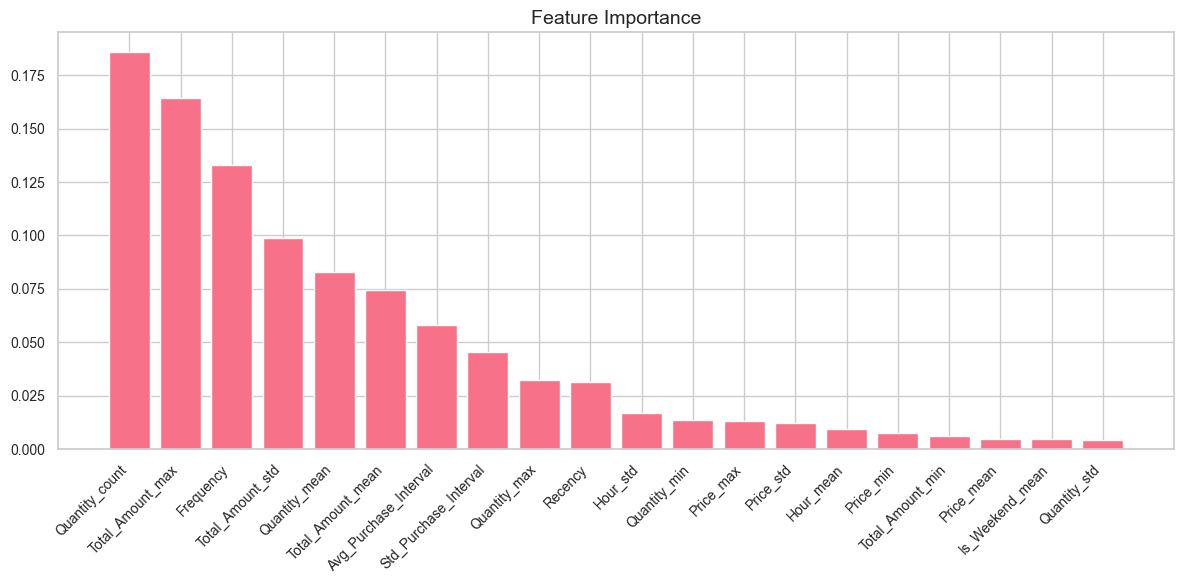

<Figure size 1200x400 with 0 Axes>

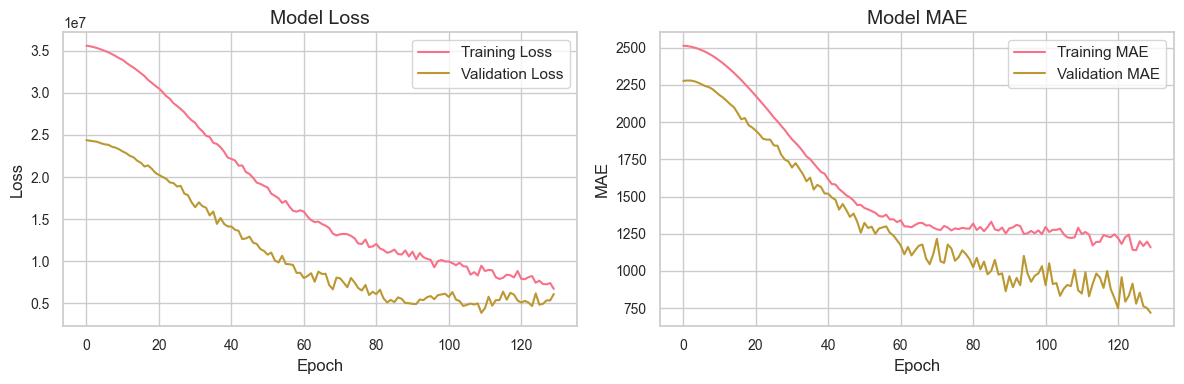

<Figure size 1000x600 with 0 Axes>

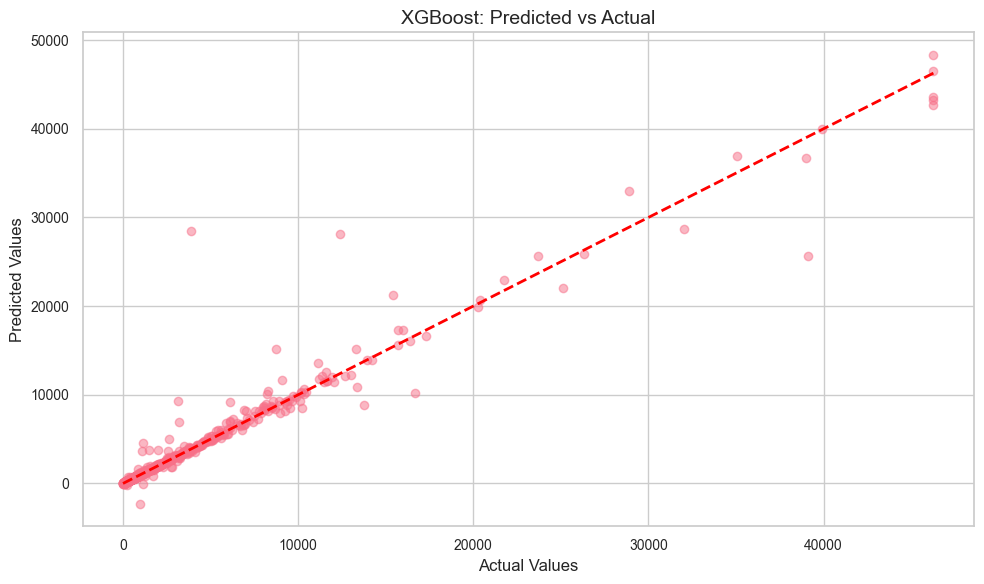

<Figure size 1000x600 with 0 Axes>

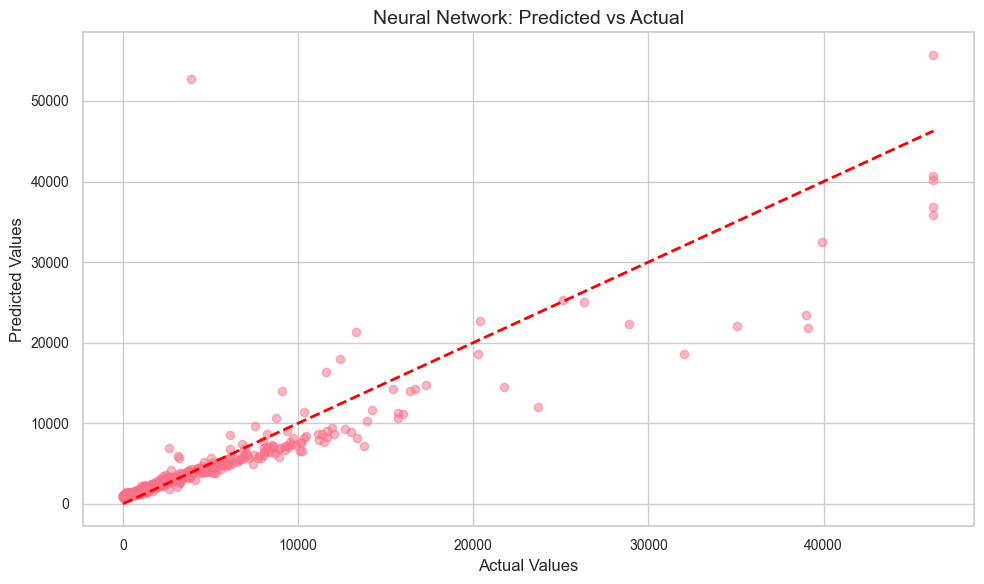

XGBoost model saved successfully
Neural Network model saved successfully
Scaler and feature names saved successfully
Predictions saved successfully
Summary statistics saved successfully
Error metrics saved successfully

All models, predictions, and visualizations saved successfully!

Model training and evaluation completed successfully!


In [40]:
#10. Save models and artifacts
def save_training_artifacts(xgb_model, nn_model, scaler, feature_names, predictions_dict):
    """
    Save all models and related artifacts
    """
    try:
        # Create directories if they don't exist
        os.makedirs('models', exist_ok=True)
        os.makedirs('results', exist_ok=True)

        # Save XGBoost model
        try:
            xgb_model.save_model('models/xgboost_model.json')
            print("XGBoost model saved successfully")
        except Exception as e:
            print(f"Error saving XGBoost model: {str(e)}")

        # Save Neural Network model
        try:
            nn_model.save('models/neural_network_model.keras')
            print("Neural Network model saved successfully")
        except Exception as e:
            print(f"Error saving Neural Network model: {str(e)}")

        # Save scaler and feature names
        try:
            joblib.dump(scaler, 'models/scaler.joblib')
            joblib.dump(feature_names, 'models/feature_names.joblib')
            print("Scaler and feature names saved successfully")
        except Exception as e:
            print(f"Error saving scaler and feature names: {str(e)}")

        # Save predictions
        try:
            # Convert predictions to proper format
            predictions_df = pd.DataFrame({
                'Actual': predictions_dict['Actual'].flatten(),
                'XGBoost_Predictions': predictions_dict['XGBoost_Predictions'].flatten(),
                'NeuralNetwork_Predictions': predictions_dict['NeuralNetwork_Predictions'].flatten()
            })
            
            # Save predictions
            predictions_df.to_csv('results/predictions.csv', index=False)
            print("Predictions saved successfully")
            
            # Save summary statistics
            summary_stats = pd.DataFrame({
                'Metric': ['Mean', 'Std', 'Min', 'Max'],
                'Actual': [predictions_df['Actual'].mean(),
                          predictions_df['Actual'].std(),
                          predictions_df['Actual'].min(),
                          predictions_df['Actual'].max()],
                'XGBoost_Predictions': [predictions_df['XGBoost_Predictions'].mean(),
                                      predictions_df['XGBoost_Predictions'].std(),
                                      predictions_df['XGBoost_Predictions'].min(),
                                      predictions_df['XGBoost_Predictions'].max()],
                'NeuralNetwork_Predictions': [predictions_df['NeuralNetwork_Predictions'].mean(),
                                            predictions_df['NeuralNetwork_Predictions'].std(),
                                            predictions_df['NeuralNetwork_Predictions'].min(),
                                            predictions_df['NeuralNetwork_Predictions'].max()]
            })
            summary_stats.to_csv('results/prediction_summary.csv', index=False)
            print("Summary statistics saved successfully")
            
            # Calculate and save error metrics
            error_metrics = pd.DataFrame({
                'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
                'XGBoost': [
                    mean_squared_error(predictions_df['Actual'], predictions_df['XGBoost_Predictions']),
                    np.sqrt(mean_squared_error(predictions_df['Actual'], predictions_df['XGBoost_Predictions'])),
                    mean_absolute_error(predictions_df['Actual'], predictions_df['XGBoost_Predictions']),
                    r2_score(predictions_df['Actual'], predictions_df['XGBoost_Predictions'])
                ],
                'Neural_Network': [
                    mean_squared_error(predictions_df['Actual'], predictions_df['NeuralNetwork_Predictions']),
                    np.sqrt(mean_squared_error(predictions_df['Actual'], predictions_df['NeuralNetwork_Predictions'])),
                    mean_absolute_error(predictions_df['Actual'], predictions_df['NeuralNetwork_Predictions']),
                    r2_score(predictions_df['Actual'], predictions_df['NeuralNetwork_Predictions'])
                ]
            })
            error_metrics.to_csv('results/error_metrics.csv', index=False)
            print("Error metrics saved successfully")

        except Exception as e:
            print(f"Error saving predictions and metrics: {str(e)}")

        return True
    except Exception as e:
        print(f"Error saving artifacts: {str(e)}")
        return False

# Main execution block
if __name__ == "__main__":
    try:
        print("Starting model training and evaluation...")
        
        # 1. Create necessary directories
        import os
        os.makedirs('models', exist_ok=True)
        os.makedirs('results', exist_ok=True)
        os.makedirs('plots', exist_ok=True)
        
        # 2. Load and preprocess data
        file_path = "online_retail_II.xlsx"
        sheet_names = ["Year 2009-2010", "Year 2010-2011"]
        
        df = load_data(file_path, sheet_names)
        df = initial_exploration(df)
        final_features = preprocess_data(df)
        
        # 3. Prepare, split, and scale data
        X = final_features.drop(columns=['Monetary'])
        y = final_features['Monetary']
        X_train_scaled, X_valid_scaled, X_test_scaled, y_train, y_valid, y_test, scaler = split_and_scale_data(X, y)
        
        # 4. Train XGBoost model
        print("\nTraining XGBoost model...")
        xgb_model, xgb_study = train_xgboost_model(X_train_scaled, X_valid_scaled, y_train, y_valid)
        
        # 5. Train Neural Network model
        print("\nTraining Neural Network model...")
        nn_model, nn_history = train_neural_network(X_train_scaled, X_valid_scaled, y_train, y_valid)
        
        # 6. Generate predictions
        xgb_preds = xgb_model.predict(X_test_scaled)
        nn_preds = nn_model.predict(X_test_scaled)
        
        # 7. Create predictions dictionary
        predictions_dict = {
            'Actual': np.array(y_test).reshape(-1, 1),
            'XGBoost_Predictions': np.array(xgb_preds).reshape(-1, 1),
            'NeuralNetwork_Predictions': np.array(nn_preds).reshape(-1, 1)
        }

        # 8. Evaluate models
        models = {
            'XGBoost': xgb_model,
            'Neural Network': nn_model
        }
        
        results = evaluate_models(models, X_test_scaled, y_test, X_valid_scaled, y_valid)
        
        # 9. Print results
        print("\nModel Evaluation Results:")
        for model_name, metrics in results.items():
            print(f"\n{model_name}:")
            for metric_name, value in metrics.items():
                print(f"{metric_name}: {value:.4f}")
        
        # 10. Create and save visualizations
        print("\nCreating visualizations...")
        
        # Feature importance plot for XGBoost
        plt.figure(figsize=(12, 6))
        plot_feature_importance(xgb_model, feature_names=X.columns.tolist())
        plt.savefig('plots/feature_importance.png', bbox_inches='tight', dpi=300)
        plt.close()
        
        # Learning curves plot for Neural Network
        plt.figure(figsize=(12, 4))
        plot_learning_curves(nn_history)
        plt.savefig('plots/learning_curves.png', bbox_inches='tight', dpi=300)
        plt.close()
        
        # Prediction scatter plots
        plt.figure(figsize=(10, 6))
        plot_predictions_scatter(y_test, xgb_preds, "XGBoost: Predicted vs Actual")
        plt.savefig('plots/xgboost_predictions.png', bbox_inches='tight', dpi=300)
        plt.close()
        
        plt.figure(figsize=(10, 6))
        plot_predictions_scatter(y_test, nn_preds, "Neural Network: Predicted vs Actual")
        plt.savefig('plots/neural_network_predictions.png', bbox_inches='tight', dpi=300)
        plt.close()
        
        # 11. Save all artifacts
        save_success = save_training_artifacts(xgb_model, nn_model, scaler, X.columns.tolist(), predictions_dict)
        
        if save_success:
            print("\nAll models, predictions, and visualizations saved successfully!")
        else:
            print("\nWarning: Some files may not have been saved properly.")
        
        print("\nModel training and evaluation completed successfully!")
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        print(traceback.format_exc())
        raise


# 11. Comprehensive Model Testing and Evaluation

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm 
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import GridSearchCV



Testing XGBoost...

Testing Neural Network...
Skipping cross-validation for Neural Network as it is not scikit-learn compatible.
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step

Comprehensive Metrics for XGBoost:
MSE: 1221306.2134
RMSE: 1105.1272
MAE: 197.7443
R2: 0.9475
Explained_Variance: 0.9476
MAPE: 10.6650
Residual_Mean: -52.2523
Residual_Std: 1103.8913
Prediction_Mean: 2285.3101
Prediction_Std: 4846.6406
True_Mean: 2233.0576
True_Std: 4823.6274

Model Assumptions:
residuals_normal: Invalid
homoscedastic: Invalid
independent: Valid


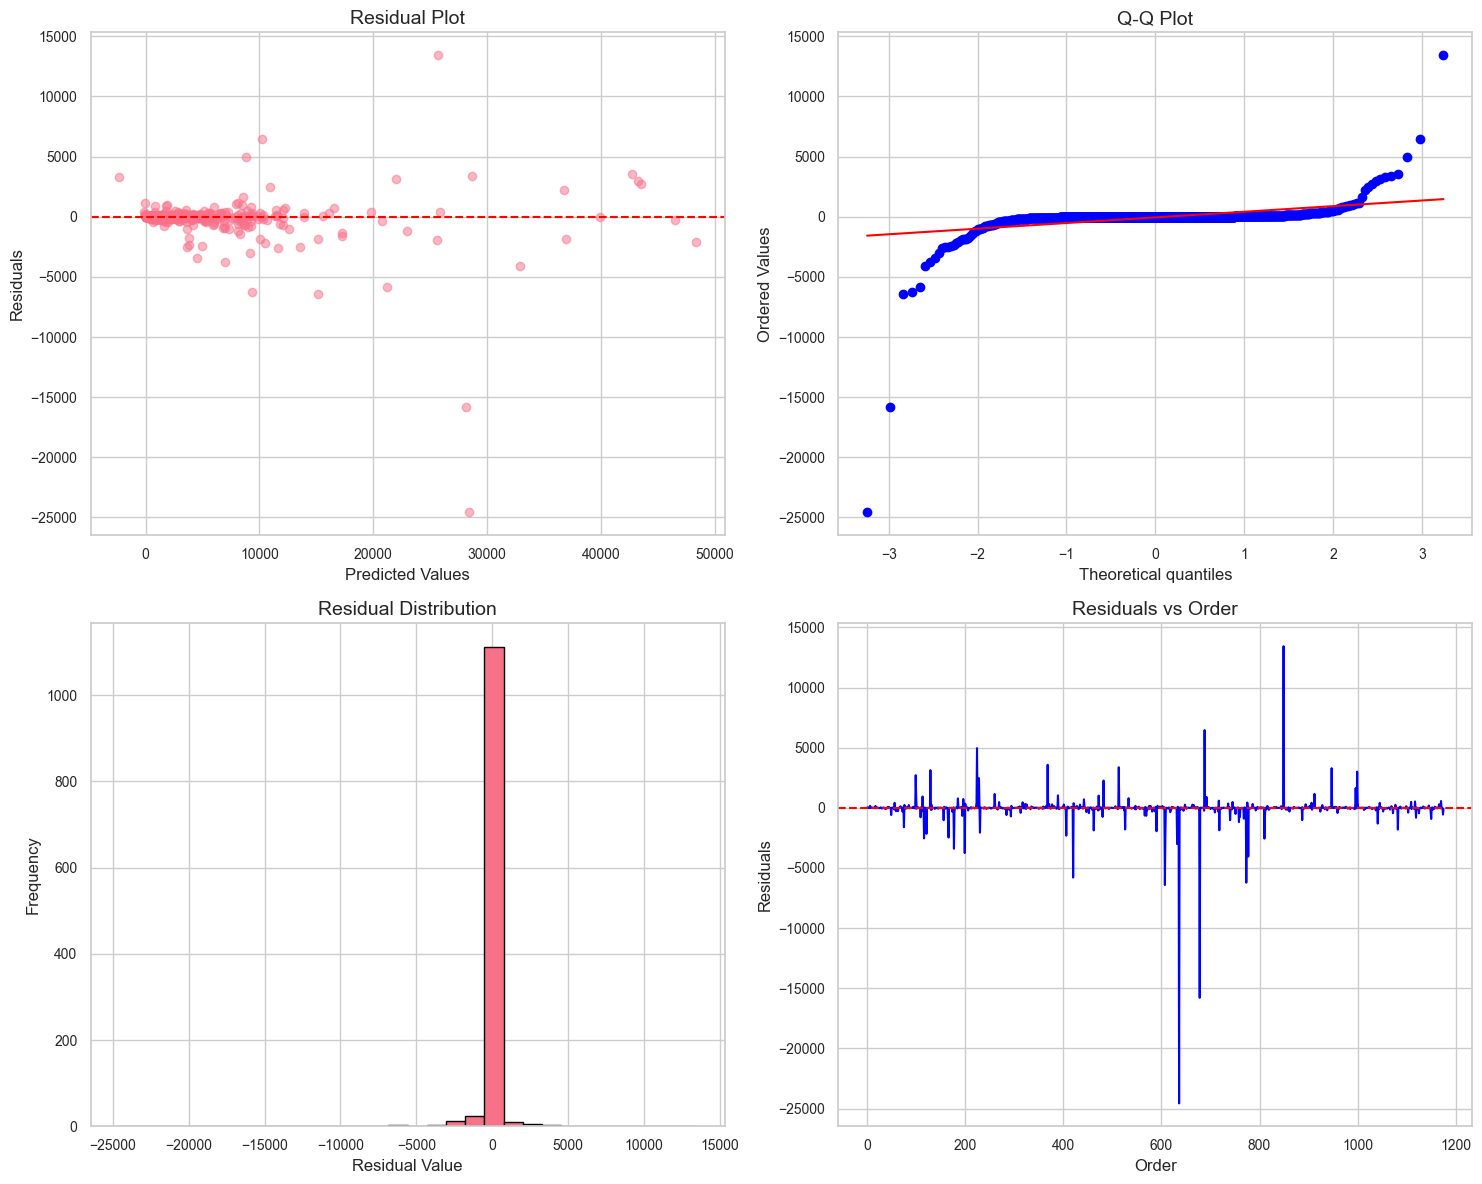


Comprehensive Metrics for Neural Network:
MSE: 17678878.5677
RMSE: 4204.6259
MAE: 630.9670
R2: 0.2402
Explained_Variance: 0.2410
MAPE: 57.3923
Residual_Mean: 133.3488
Residual_Std: 4202.5108
Prediction_Mean: 2099.7087
Prediction_Std: 6169.9243
True_Mean: 2233.0576
True_Std: 4823.6274

Model Assumptions:
residuals_normal: Invalid
homoscedastic: Invalid
independent: Valid


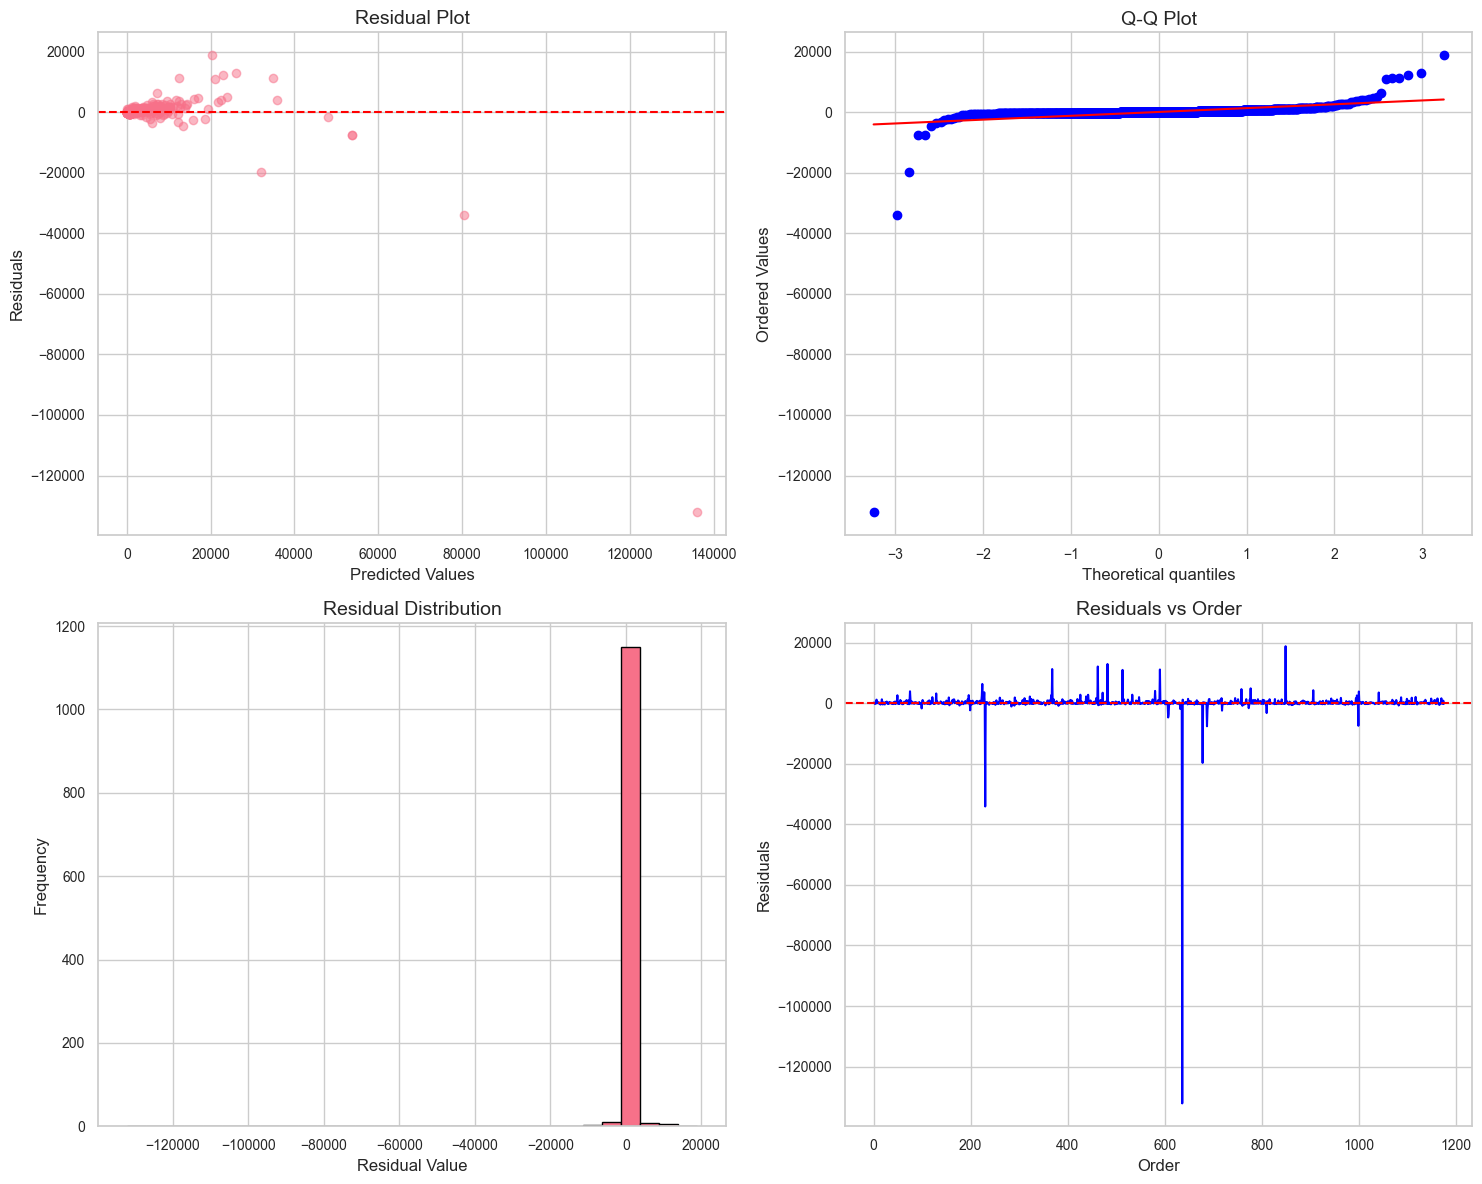


Best XGBoost Parameters after Fine-tuning:
learning_rate: 0.1
max_depth: 5
n_estimators: 200


In [44]:
# 11. Comprehensive Model Testing and Evaluation

def feature_selection(X_train, y_train, X_valid, X_test, k=10):
    from sklearn.feature_selection import SelectKBest, f_regression
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_valid_selected = selector.transform(X_valid)
    X_test_selected = selector.transform(X_test)
    return X_train_selected, X_valid_selected, X_test_selected

X_train_selected, X_valid_selected, X_test_selected = X_train, X_valid, X_test

# 11.1 Advanced Model Testing
def comprehensive_model_testing(models, X_train, X_valid, X_test, y_train, y_valid, y_test):
    test_results = {}

    for name, model in models.items():
        print(f"\nTesting {name}...")

        # Handle cross-validation only for scikit-learn compatible models
        if hasattr(model, "fit") and hasattr(model, "predict") and hasattr(model, "get_params"):
            # Cross-validation scores
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
            cv_mean = -cv_scores.mean()
            cv_std = cv_scores.std()
        else:
            # Skip cross-validation for incompatible models (e.g., Sequential)
            cv_scores = None
            cv_mean = None
            cv_std = None
            print(f"Skipping cross-validation for {name} as it is not scikit-learn compatible.")

        # Train and evaluate on each dataset split
        model.fit(X_train, y_train, epochs=50, verbose=0) if name == "Neural Network" else model.fit(X_train, y_train)

        # Predictions on all sets
        train_preds = model.predict(X_train).reshape(-1)
        valid_preds = model.predict(X_valid).reshape(-1)
        test_preds = model.predict(X_test).reshape(-1)

        # Calculate residuals
        train_residuals = y_train - train_preds
        valid_residuals = y_valid - valid_preds
        test_residuals = y_test - test_preds

        # Store results
        test_results[name] = {
            'cv_scores': cv_scores,
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'train_residuals': train_residuals,
            'valid_residuals': valid_residuals,
            'test_residuals': test_residuals,
            'train_preds': train_preds,
            'valid_preds': valid_preds,
            'test_preds': test_preds
        }
        
    return test_results

# 11.2 Comprehensive Evaluation Metrics
def calculate_comprehensive_metrics(y_true, y_pred, residuals):
    # Ensure y_true and y_pred are 1-dimensional
    y_true = y_true.values.flatten() if isinstance(y_true, pd.Series) else y_true.flatten()
    y_pred = y_pred.values.flatten() if isinstance(y_pred, pd.Series) else y_pred.flatten()
    
    metrics = {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred),
        'Explained_Variance': explained_variance_score(y_true, y_pred),
        'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        'Residual_Mean': np.mean(residuals),
        'Residual_Std': np.std(residuals),
        'Prediction_Mean': np.mean(y_pred),
        'Prediction_Std': np.std(y_pred),
        'True_Mean': np.mean(y_true),
        'True_Std': np.std(y_true)
    }
    return metrics

# 11.3 Model Validation Functions
def validate_model_assumptions(residuals, y_pred):
    assumptions = {}
    
    # Normality test of residuals
    _, normality_p_value = stats.normaltest(residuals)
    assumptions['residuals_normal'] = normality_p_value > 0.05
    
    # Homoscedasticity test (Breusch-Pagan test)
    y_pred_with_constant = sm.add_constant(y_pred.reshape(-1, 1))  # Add a constant to y_pred
    lm_stat, homo_p_value, _, _ = het_breuschpagan(residuals, y_pred_with_constant)
    assumptions['homoscedastic'] = homo_p_value > 0.05
    
    # Independence test (Durbin-Watson)
    dw_statistic = durbin_watson(residuals)
    assumptions['independent'] = 1.5 < dw_statistic < 2.5
    
    return assumptions


# 11.4 Fine-Tuning Functions
def fine_tune_model(model, X_train, X_valid, y_train, y_valid, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model, grid_search.best_params_

# 11.5 Visualization of Testing Results
def plot_comprehensive_diagnostics(test_results, model_name):
    residuals = test_results[model_name]['test_residuals']
    predictions = test_results[model_name]['test_preds']
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    # Residual Plot
    axes[0, 0].scatter(predictions, residuals, alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Predicted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residual Plot')
    # QQ Plot
    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot')
    # Residual Histogram
    axes[1, 0].hist(residuals, bins=30, edgecolor='black')
    axes[1, 0].set_xlabel('Residual Value')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Residual Distribution')
    # Residual vs Order
    axes[1, 1].plot(range(len(residuals)), residuals, 'b-')
    axes[1, 1].axhline(y=0, color='r', linestyle='--')
    axes[1, 1].set_xlabel('Order')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].set_title('Residuals vs Order')
    plt.tight_layout()
    plt.show()

# Main execution for testing and evaluation
if __name__ == "__main__":
    # Perform comprehensive testing
    test_results = comprehensive_model_testing(models, X_train_selected, X_valid_selected, X_test_selected, y_train, y_valid, y_test)
    # Calculate metrics for each model
    for name in models.keys():
        print(f"\nComprehensive Metrics for {name}:")
        metrics = calculate_comprehensive_metrics(y_test, test_results[name]['test_preds'], test_results[name]['test_residuals'])
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.4f}")
        # Validate model assumptions
        assumptions = validate_model_assumptions(test_results[name]['test_residuals'], test_results[name]['test_preds'])
        print("\nModel Assumptions:")
        for assumption, valid in assumptions.items():
            print(f"{assumption}: {'Valid' if valid else 'Invalid'}")
        # Plot diagnostics
        plot_comprehensive_diagnostics(test_results, name)
    # Fine-tuning example for XGBoost
    xgb_param_grid = {'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}
    best_xgb_model, best_params = fine_tune_model(models['XGBoost'], X_train_selected, X_valid_selected, y_train, y_valid, xgb_param_grid)
    print("\nBest XGBoost Parameters after Fine-tuning:")
    for param, value in best_params.items():
        print(f"{param}: {value}")

# 11.6 Generate Final Report
def generate_evaluation_report(test_results, metrics, assumptions):
    report = {
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'model_performance': metrics,
        'model_assumptions': assumptions,
        'cross_validation_results': {
            'mean_score': test_results['cv_mean'],
            'score_std': test_results['cv_std']
        }
    }
    # Save report as JSON
    with open('model_evaluation_report.json', 'w') as f:
        json.dump(report, f, indent=4)
    return report

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load survey data
survey_data_df = pd.read_csv('survey_responses.csv')

# Check column names to ensure they match expected names
print("Survey data columns:", survey_data_df.columns)

# Ensure there are no leading/trailing whitespaces in column names
survey_data_df.columns = survey_data_df.columns.str.strip()

# Define categorical and numerical columns
categorical_features = [
    'Gender', 'Country', 'Store Types Used', 'Shopping Frequency',
    'Card Storage Method', 'Feature Preferences'
]

# Verify that categorical_features are in survey_data_df
missing_cols = [col for col in categorical_features if col not in survey_data_df.columns]
if missing_cols:
    print(f"Warning: These columns are missing from the DataFrame: {missing_cols}")
else:
    print("All specified columns are present.")

# Step 1: Map Age Ranges to Numerical Values
age_mapping = {
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55+': 60
}
survey_data_df['Age'] = survey_data_df['Age'].map(age_mapping)

# Step 2: Apply Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scale', StandardScaler(), ['Age', 'Membership Count', 'Unified System Preference', 'Adoption Likelihood'])
    ],
    remainder='passthrough' 
)

# Fit and transform the data
processed_survey_data = pd.DataFrame(preprocessor.fit_transform(survey_data_df))

# Set column names after transformation
processed_survey_data.columns = preprocessor.get_feature_names_out()

# Display processed data
print("\nProcessed Survey Data:")
print(processed_survey_data.head())


Survey data columns: Index(['Age', 'Gender', 'Country', 'Membership Count', 'Store Types Used',
       'Shopping Frequency', 'Pain Points', 'Card Storage Method',
       'Unified System Preference', 'Feature Preferences',
       'Adoption Likelihood'],
      dtype='object')
All specified columns are present.

Processed Survey Data:
  onehot__Gender_Female onehot__Gender_Male onehot__Gender_Other  \
0                   1.0                 0.0                  0.0   
1                   0.0                 1.0                  0.0   
2                   1.0                 0.0                  0.0   
3                   0.0                 1.0                  0.0   
4                   0.0                 0.0                  1.0   

  onehot__Country_France onehot__Country_Germany onehot__Country_Ireland  \
0                    0.0                     0.0                     1.0   
1                    0.0                     1.0                     0.0   
2                    1.0     

In [73]:
# Add 'Pain Points' to categorical features for one-hot encoding
categorical_features.append('Pain Points')

# Update the preprocessor to include 'Pain Points' in one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scale', StandardScaler(), ['Age', 'Membership Count', 'Unified System Preference', 'Adoption Likelihood'])
    ],
    remainder='passthrough'  # Keep other columns unchanged if any remain
)

# Re-process the survey data
processed_survey_data = pd.DataFrame(preprocessor.fit_transform(survey_data_df))

# Set new column names
processed_survey_data.columns = preprocessor.get_feature_names_out()

# Display processed data
print("\nProcessed Survey Data after including 'Pain Points':")
print(processed_survey_data.head())



Processed Survey Data after including 'Pain Points':
   onehot__Gender_Female  onehot__Gender_Male  onehot__Gender_Other  \
0                    1.0                  0.0                   0.0   
1                    0.0                  1.0                   0.0   
2                    1.0                  0.0                   0.0   
3                    0.0                  1.0                   0.0   
4                    0.0                  0.0                   1.0   

   onehot__Country_France  onehot__Country_Germany  onehot__Country_Ireland  \
0                     0.0                      0.0                      1.0   
1                     0.0                      1.0                      0.0   
2                     1.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      1.0   

   onehot__Country_UK  onehot__Country_USA  

In [75]:
print(processed_survey_data.columns)

Index(['onehot__Gender_Female', 'onehot__Gender_Male', 'onehot__Gender_Other',
       'onehot__Country_France', 'onehot__Country_Germany',
       'onehot__Country_Ireland', 'onehot__Country_UK', 'onehot__Country_USA',
       'onehot__Store Types Used_Electronics',
       'onehot__Store Types Used_Fashion', 'onehot__Store Types Used_Grocery',
       'onehot__Store Types Used_Restaurant',
       'onehot__Store Types Used_Retail', 'onehot__Shopping Frequency_Daily',
       'onehot__Shopping Frequency_Monthly',
       'onehot__Shopping Frequency_Quarterly',
       'onehot__Shopping Frequency_Weekly',
       'onehot__Card Storage Method_Mixed',
       'onehot__Card Storage Method_Phone Wallet',
       'onehot__Card Storage Method_Physical Wallet',
       'onehot__Card Storage Method_nan',
       'onehot__Feature Preferences_Auto-registration',
       'onehot__Feature Preferences_Digital Cards',
       'onehot__Feature Preferences_Points System',
       'onehot__Feature Preferences_Rewards T

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
X_survey = processed_survey_data.drop(columns=['scale__Adoption Likelihood'])  # Adjusted column name
y_survey = processed_survey_data['scale__Adoption Likelihood']  # Adjusted column name

# Split data into training and testing sets
X_train_survey, X_test_survey, y_train_survey, y_test_survey = train_test_split(
    X_survey, y_survey, test_size=0.2, random_state=42
)

# Train a model (Random Forest)
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_survey, y_train_survey)

# Make predictions and evaluate
y_pred_survey = model_rf.predict(X_test_survey)
mse = mean_squared_error(y_test_survey, y_pred_survey)
r2 = r2_score(y_test_survey, y_pred_survey)

print(f"Model Test Results for Adoption Likelihood Prediction:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Model Test Results for Adoption Likelihood Prediction:
Mean Squared Error: 1.0723330431219913
R-squared: -0.05708300970873803


In [77]:
# Concatenate processed_survey_data with final_features
expanded_features = pd.concat([final_features.reset_index(drop=True), processed_survey_data.reset_index(drop=True)], axis=1)

print("Expanded features shape:", expanded_features.shape)
print(expanded_features.head())


Expanded features shape: (5878, 54)
   Recency  Frequency      Monetary  Quantity_count  Quantity_mean  \
0      325       34.0  46278.462159            34.0    1120.514659   
1        1      222.0   4921.530000           222.0      13.364865   
2       74       51.0   2019.400000            51.0      53.215686   
3       18      175.0   4428.690000           175.0       9.280000   
4      309       17.0    334.400000            17.0      11.588235   

   Quantity_std  Quantity_min  Quantity_max  Price_mean  Price_std  ...  \
0   1939.386920           1.0   4578.572409    6.100000   1.883066  ...   
1     17.337408           2.0    240.000000    2.498063   2.230495  ...   
2     48.700848           1.0    144.000000    3.786275  10.677136  ...   
3      7.770886           1.0     48.000000    8.459657  32.808193  ...   
4      4.345383           1.0     24.000000    3.841176   9.334751  ...   

   onehot__Feature Preferences_Points System  \
0                                        0.0

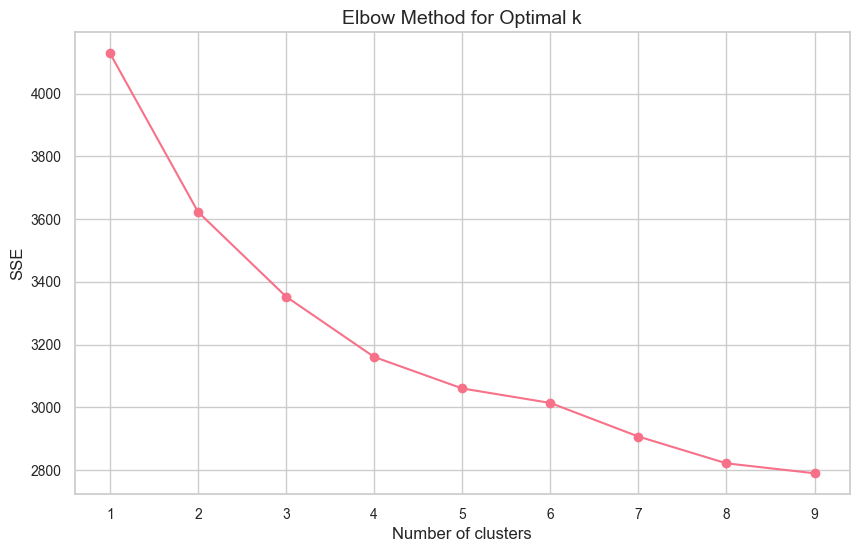

Cluster
0    195
2    172
1    133
Name: count, dtype: int64


In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose optimal number of clusters using the elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_survey)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k to find the elbow
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

# Perform clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume k=3 based on the elbow method
survey_clusters = kmeans.fit_predict(X_survey)

# Add cluster labels to the survey data for further analysis
processed_survey_data['Cluster'] = survey_clusters

# Visualize cluster distribution
print(processed_survey_data['Cluster'].value_counts())


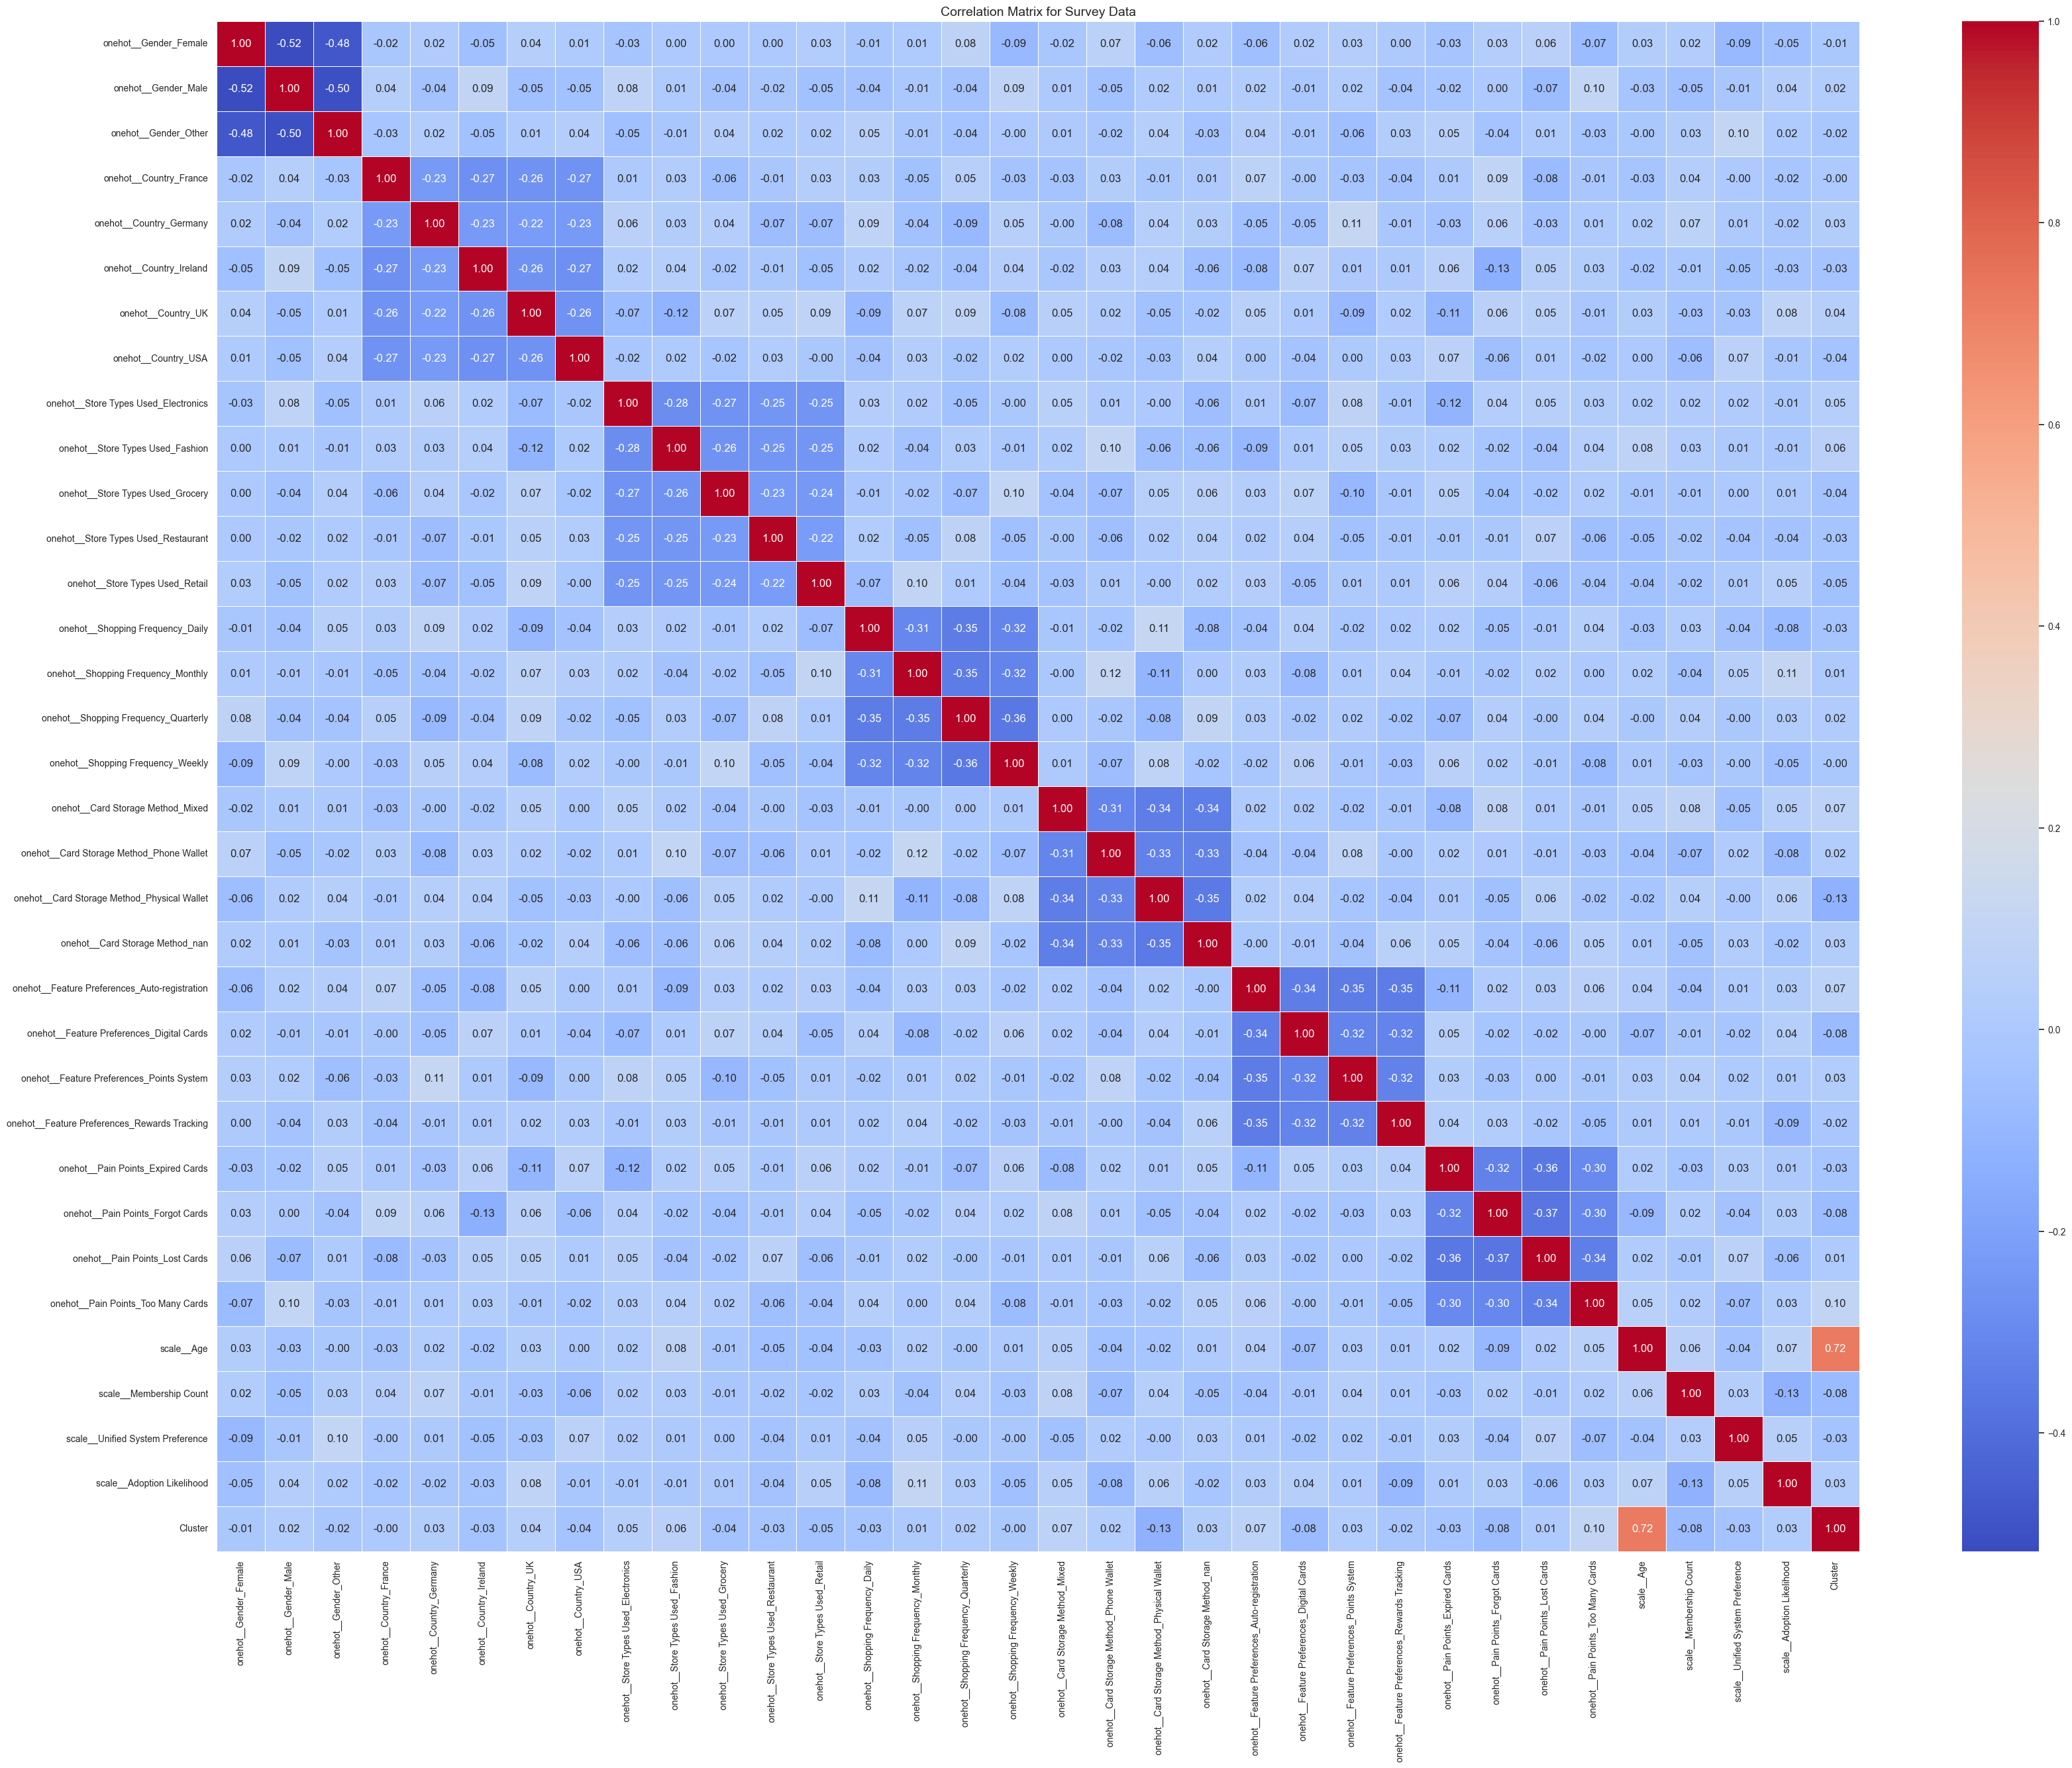


Features strongly correlated with Adoption Likelihood and Unified System Preference:
                                               scale__Adoption Likelihood  \
scale__Adoption Likelihood                                       1.000000   
onehot__Shopping Frequency_Monthly                               0.107820   
onehot__Country_UK                                               0.082104   
scale__Age                                                       0.073612   
onehot__Card Storage Method_Physical Wallet                      0.055166   
scale__Unified System Preference                                 0.050147   
onehot__Store Types Used_Retail                                  0.049578   
onehot__Card Storage Method_Mixed                                0.047487   
onehot__Feature Preferences_Digital Cards                        0.044955   
onehot__Gender_Male                                              0.037370   
onehot__Pain Points_Forgot Cards                                 0.

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for survey data
correlation_matrix = processed_survey_data.corr()

# Visualize the full correlation matrix
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Survey Data')
plt.show()

# Specifically look at correlations with 'scale__Adoption Likelihood' and 'scale__Unified System Preference'
correlations_of_interest = correlation_matrix[['scale__Adoption Likelihood', 'scale__Unified System Preference']].sort_values(by='scale__Adoption Likelihood', ascending=False)
print("\nFeatures strongly correlated with Adoption Likelihood and Unified System Preference:")
print(correlations_of_interest)
